### Universidade Federal do Rio Grande - FURG

### Escola de Engenharia - EE

### Programa de Pós-graduação em Engenharia Oceânica - PPGEO

### Disciplina: Confiabilidade em Engenharia

### Professor: Dr. Mauro de Vasconcellos Real

# __Aula 11__

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import lognorm
from scipy.stats import gumbel_r
from scipy.stats import invweibull
from scipy import optimize
from scipy.special import gamma

# __Capítulo 6 - Simulação numérica e o Método de Monte Carlo__ <a name="section_6"></a>

[6.1 - Introdução](#section_61)  
[6.2 - O essencial do Método de Simulações de Monte Carlo](#section_62)  
[6.3 - Geração de números aleatórios](#section_63)  
[6.4 - Determinação da probabilidade de falha através do Método de Monte Carlo](#section_64)   
[6.5 - Aplicações do Método de Monte Carlo](#section_65)   
[6.6 - Amostragem por Importância](#section_66) 

## __6.1 - Introdução__  <a name="section_61"></a>

* Simulação consiste em se tentar reproduzir o comportamento de um sistema através de um modelo físico ou matemático.

<img src="./images6/simulations.jpg" alt="Simulações numéricas" style="width:474px"/>

Fonte: https://www.researchgate.net/publication/333496524/figure/fig2/AS:764445592649728@1559269440601/Examples-of-the-models-theories-and-case-studies-in-the-accepted-papers_W640.jpg

* O progresso dos computadores digitais tem incentivado cada vez mais o uso de modelos numéricos.

* A resposta de um modelo depende de seus parâmetros de entrada.

* Se os parâmetros de entrada de um modelo são variáveis aleatórias, que possuem determinadas distribuições de probabilidade;

* Então, a resposta do modelo também será uma variável aleatória.

<img src="./images6/monte_carlo.jpg" alt="Simulações de Monte Carlo" style="width:474px"/>

* Apenas em alguns poucos casos é possível obter-se analiticamente a distribuição de probabilidade da resposta do sistema em função das distribuições de probabilidade das variáveis de entrada (ver Capítulo 4), como por exemplo no caso em que a função $Y$ é igual ao logaritmo neperiano de uma variável aleatória lognormal, conforme a figura abaixo.


<img src="./images6/lognormal.jpg" alt="Função logarítmica" style="width:800px"/>

* Em geral:
* As variáveis de entrada do sistema possuem distribuições de probabilidade as mais diversas. 
* A resposta do sistema é governada por uma função altamente não-linear.
* Não existe uma função $Y=g(X_1,X_2,...,X_n)$ na forma explícita.
* Então, não é possível obter-se uma solução analítica para a distribuição de probabilidade da resposta do sistema.
* Surge, então, a necessidade da utilização de métodos numéricos que permitam obter uma estimativa da forma da distribuição de probabilidade da resposta do sistema e seus principais momentos, em função das distribuições de probabilidade dos parâmetros de entrada.


* O __Método de Monte Carlo__ consiste basicamente em obter-se uma estimativa da distribuição de probabilidade da resposta de um sistema através das seguintes etapas:
1. Geração aleatória dos parâmetros de entrada, de acordo com as suas distribuições de probabilidade específicas;
2. Realização de inúmeras simulações com um modelo numérico a partir destes dados; 
3. Análise estatística das diversas respostas encontradas.

* A Figura abaixo ilustra o funcionamento do Método de Monte Carlo:

<img src="./images6/monte_carlo_fluxograma.jpg" alt="Fluxograma do Método de Monte Carlo" style="width:474px"/>

[Retornar ao início da aula](#section_6)

## __6.2 - O essencial do Método de Simulação de Monte Carlo__  <a name="section_62"></a>

* O princípio do Método de Monte Carlo é desenvolver um modelo numérico para representar o comportamento de um sistema de Engenharia.

<img src="./images6/modelo_plataforma.jpg" alt="Modelo de plataforma" style="width:600px"/>

Fonte: (a) https://en.wikipedia.org/wiki/File:Gulf_Offshore_Platform.jpg

* Se os parâmetros de entrada do modelo forem variáveis aleatórias, suas distribuições de probabilidade devem ser especificadas.

<img src="./images6/probability_distributions.jpg" alt="Distribuições de probabilidade" style="width:600px"/>

* Um conjunto de dados de entrada deve ser gerado aleatoriamente a partir das distribuições de probabilidade especificadas.

* Uma análise do sistema deve ser realizada através do modelo, utilizando os dados de entrada gerados aleatoriamente.  

* Cada análise do sistema é chamada de simulação.

<img src="./images6/entrada_modelo_saida.jpg" alt="Entrada-Modelo-Resposta" style="width:600px"/>

* As simulações são realizadas $n$ vezes.
* Em cada simulação são empregados dados de entrada aleatórios diferentes.
* No final tem-se uma amostra de $n$ respostas diferentes do sistema armazenada $(y_1, y_2,..., y_n)$.


<img src="./images6/resposta_aleatoria.jpg" alt="Resposta aleatória do sistema" style="width:474px"/>

* Análise estatística da resposta do sistema.

Média:

$$\mu_Y = \frac{1}{N}\sum_{i=1}^{n}y_i$$

Desvio padrão:

$$\sigma_Y = \sqrt{\sum_{i=1}^{n}\frac{(y_i-\mu_Y)^2}{n-1}}$$

* A precisão do Método de Monte Carlo depende do número $n$ de simulações realizadas!

* Quanto maior o número de simulações, maior o tempo de processamento numérico necessário.

#### Etapas do Método de Monte Carlo:

1. Elaborar um modelo matemático para o sistema: $Y = g(X_1, X_2,..., X_n)$.

2. Gerar um conjunto de dados de entrada aleatórios: $X = (X_1, X_2, ..., X_n)$

3. Realizar a análise do sistema através do modelo e armazenar as respostas: $Y =(Y_1, Y_2, ..., Y_n)$

4. Repetir os passos 2 e 3, para i =1 até N.

5. Analisar os resultados obtidos para a resposta do sistema usando histogramas, estatística descritiva (média, desvio-padrão,...), intervalos de confiança, etc.

[Retornar ao início da aula](#section_6)

## __6.3 - Geração de números aleatórios__  <a name="section_63"></a>

### 6.3.1 - Geração de números aleatórios de distribuição uniforme

* A utilização do Método de Monte Carlo está vinculada à capacidade de se gerar números aleatórios no computador.

* A geração de números aleatórios no computador normalmente está baseada em algoritmos recursivos capazes de gerar números uniformemente distribuídos entre $0$ e $1$. 

* Um dos algoritmos geradores de números aleatórios mais utilizados são os do tipo __gerador linear congruencial__. No entanto, a sequência de números fornecida por este tipo de gerador é, na realidade, determinística e reproduzível, dependendo apenas das constantes iniciais fornecidas ao gerador, por isto os números gerados por estes algoritmos são chamados de _pseudo-aleatórios_.

* No entanto, a maioria das linguagens de programação atuais possuem geradores de números aleatórios pré-definidos, que são capazes de gerar sequências de números aleatórios suficientemente grandes para as principais aplicações práticas. Maiores detalhes sobre a geração de números randômicos podem ser encontrados no livro de BECK, listado na bibliografia abaixo.

### 6.3.2 - Geração de números aleatórios - Técnica da Transformação Inversa

* O __Método da Transformação Inversa__ para a geração de números aleatórios segundo uma distribução qualquer $F_X(x)$ consiste de quatro passos:

1. Gerar um Gerar um número aleatório $u_i$, com distribuição uniforme entre $0$ e $1$.

2. Este número pode ser considerado como igual à própria distribuição de probabilidade acumulada $F_U(u_i)$ de uma distribuição uniforme: $F_U(u_i) = u_i$.

3. Igualar as probabilidades acumuladas: $F_X(x_i) = F_U(u_i)$

4. Determinar o valor de $x_i$ correspondente: $x_i = F_X^{-1}(u_i)$

Este procedimento é ilustrado na Figura abaixo.

<img src="./images6/transformacao_inversa.jpg" alt="Método da Transformação Inversa" style="width:800px"/>

Fonte: HALDAR, A. MAHADEVAN, S. Probability, reliability, and statistical methods in engineering design. New York, Wiley, 2000.

#### Exemplo 6.1 - Distribuição de Valores Extremos do Tipo I - Gumbel

* Se $Y_n$ é uma variável aleatória com distribuição de valores extremos do Tipo I (Gumbel) para valores máximos, então:

$$F_{Y_n}(y) = \exp{\left[-\exp{-\alpha_n(y - u_n)}\right]}$$

* Gerar números aleatórios com esta distribuição a partir do Método da Transformação Inversa:

1. Gerar um Gerar um número aleatório $u_i$, com distribuição uniforme entre $0$ e $1$.

2. Admitir que: $F_U(u_i) = u_i$.

3. Igualar as probabilidades acumuladas:

$$u_i = F_U(u_i) = F_{Y_n}(y_i)$$

$$u_i = F_U(u_i) = \exp{\left[-e^{-\alpha_n(y_i - u_n)}\right]}$$

4. Determinar o valor de $y_i$ correspondente: $y_i = F_{Y_n}^{-1}(u_i)$

$$\ln(u_i) = -e^{-\alpha_n(y - u_n)}$$

$$\ln\left[\frac{1}{\ln\left(\frac{1}{u_i}\right)}\right] = \alpha_n(y_i-u_i)$$

$$y_i = u_n + \frac{1}{\alpha_n}\ln\left[\frac{1}{\ln\left(\frac{1}{u_i}\right)}\right]$$ 


* Dados: $\mu_{Y_n} = 100$ e $\sigma_{Y_n} = 20$

* $u_n$ é o valor mais provável de $Y_n$ (moda).

* $\alpha_n$ é o inverso de uma medida de dispersão dos valores de $Y_n$.

$$u_n = \mu_{Y_n} - \frac{\gamma}{\alpha_n} = 90,9989$$

$$\alpha_n = \sqrt{\frac{\pi^2}{6\sigma_{Y_n}^2}} = 0,0641$$

* Onde $\gamma = 0,577216$ é o número de Euler.

* Fórmula geradora:

$$y_i = 90,9989 + \frac{1}{0,0641}\ln\left[\frac{1}{\ln\left(\frac{1}{u_i}\right)}\right]$$ 

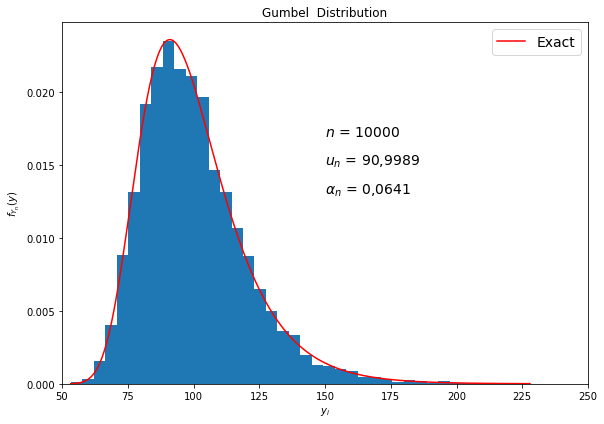

In [75]:
"""
Geração de números aleatórios com a distribuição de Gumbel
"""
# Dados de entrada
n = 10_000
mu_yn = 100.00 
sigma_yn = 20.00
gamma = 0.577216
# Parâmetros da distribuição de Gumbel
alpha_n = np.pi / (np.sqrt(6) * sigma_yn)
u_n = mu_yn - gamma / alpha_n
# Geração de números com distribuição uniforme entre 0 e 1
u_i = np.random.rand(n)
# Geração de número com distribuição de Gumbel
y_i = u_n + 1 / alpha_n * np.log(1 / np.log(1 / u_i))
# Histograma dos valores de yi
plt.figure(figsize=(8.5, 6))
fy = plt.hist(y_i, bins=40, density=True)
# Exact pdf for Gumbel
y = np.linspace(min(y_i),max(y_i), 1000)
pdf_y = alpha_n * np.exp(- alpha_n * (y - u_n))*np.exp(- np.exp(- alpha_n*(y - u_n)))
plt.plot(y, pdf_y, color='red', label="Exact")
plt.xlabel(r'$y_i$')
plt.ylabel(r'$f_{Y_n}(y)$')
plt.legend(loc='upper right', fontsize="14")
plt.title('Gumbel  Distribution')
plt.text(150, 0.017, r"$n$ = 10000", fontsize="14")
plt.text(150, 0.015, r"$u_n$ = 90,9989", fontsize="14")
plt.text(150, 0.013, r"$\alpha_n$ = 0,0641", fontsize="14")
plt.xlim(50, 250)
plt.tight_layout()
plt.show()

[Retornar ao início da aula](#section_6)

### 6.3.3 Geração de números aleatórios com distribuição conjunta

* Seja  $X_1, X_2, ..., X_n$ um conjunto de $n$ varáveis aleatórias.

#### Geração de variáveis estatisticamente independentes:

* Se as variáveis forem __estatisticamente independentes__, a função densidade de probabilidade conjunta será:

$$f_{X_1, X_2, ..., X_n}(x_1, x_2,..., x_n) = \prod_{i=1}^n f_{X_i}(x_i)$$

* Onde $f_{X_i}(x_i)$ é a função densidade marginal de $X_i$.

* No caso de variáveis aleatórias independentes os números randômicos podem ser gerados separadamente e independentemente para cada variável, usando o Método da Transformação Inversa, por exemplo:

* Para $i = 1$ até $n$: $x_i = F_{X_i}^{-1}(u_i)$

#### Geração de variáveis aleatórias correlacionadas:

* Se as variáveis $X_1, X_2, ..., X_n$ forem dependentes sua função densidade de probabilidade conjunta será dada por:

$$f_{X_1, X_2, ..., X_n}(x_1, x_2,..., x_n) = f_{X_1}(x_1) f_{X_2}(x_2|x_1)...f_{X_n}(x_n|x_1,x_2,...,x_{n-1})$$

Onde:

$f_{X_1}(x_1)$ é a função densidade de probabilidade marginal de $X_1$;

$f_{X_n}(x_n|x_1,x_2,...,x_{n-1}$ é a função densidade de probabilidade condicional $X_k$, dado que: $X_1 = x_1, X_2 = x_2,..., X_{k-1} = x_{k-1}$.

* A função densidade de probabilidade acumulada conjunta será:

$$F_{X_1, X_2, ..., X_n}(x_1, x_2,..., x_n) = F_{X_1}(x_1) F_{X_2}(x_2|x_1)...F_{X_n}(x_n|x_1,x_2,...,x_{n-1})$$

Onde:

$F_{X_1}(x_1)$ é a função densidade de probabilidade acumulada (FDPA) marginal de $X_1$;

$F_{X_n}(x_n|x_1,x_2,...,x_{n-1}$ é a função densidade de probabilidade acumulada (FDPA) condicional $X_k$, dado que: $X_1 = x_1, X_2 = x_2,..., X_{k-1} = x_{k-1}$.

* No caso de variáveis correlacionadas os números randômicos não podem ser gerados de forma independente para cada variável.

* Em primeiro lugar é necessários gerar um conjunto de números aleatórios de distribuição uniforme: $(u_1, u_2, ..., u_n)$

* O valor de $x_1$ pode ser determinado de forma independente: $x_1 = F_{X_1}(u_1)$
 
* Conhecido o valor de $x_1$, a função FDPA condicional de $X_2$: $F_{X_2}(x_2|x_1)$ será uma função somente de $x_2$. Portanto, $x_2$ pode ser obtido a partir de: $x_2 = F_{X_2}^{-1}(u_2|x_1)$

* Sucessivamente, com os valores $x_1, x_2,..., x_{k-1}$ já obtidos, determina-se o valor de $x_k$ através de: $x_{k} = F_{X_k}^{-1}(u_k|x_1, x_2,...,x_{k-1})$

* O conjunto de valores  $(x_1, x_2,..., x_n)$ das variáveis correlacionadas são obtidos, então, de forma recursiva.

* Este método será eficiente se as funções inversas de $F_{X_1}(x_1) \rightarrow x_1 = F_{X_1}^{-1}(u_1)$ e de $F_{X_k}(x_k|x_1,x_2,...,x_{k-1}) \rightarrow x_{k} = F_{X_k}^{-1}(u_k|x_1, x_2,...,x_{k-1})$, puderem ser obtidas de forma analítica. Como este usualmente não é o caso, é mais comum empregar-se o __Modelo de Nataf__ descrito a seguir.

### 6.3.4 - Modelo de Nataf

* O __Modelo de Nataf__ permite a geração de amostras de variáveis aleatórias correlacionadas, quando as distribuições de probabilidade condicionais necessárias a aplicação do método exposto no item 6.3.3 não estão disponíveis na forma analítica, ou quando suas funções inversas não podem ser obtidas de forma simples (BECK, 2019).

* O __Modelo de Nataf__ pode ser descrito através da aplicação dos seguintes passos:

1. Em primeiro lugar é gerada uma amostra de números aleatórios de distribuição normal padronizada, não correlacionados, de média zero e variância unitária, na forma de um vetor: $\textbf{y}_k =\{y_1,y_2,...,y_n\}_k^t$.

2. Monta-se uma matriz de correlação $\textbf{R}_\textbf{X}$, $n \times n$, entre as variáveis $X_1, X_2, ..., X_n$ dada na forma:


$$\textbf{R}_\textbf{X}=\left[\begin{array}{cccc} 1           & \rho_{X_{12}} & ...  & \rho_{X_{1n}} \\
                                            \rho_{X_{21}} & 1           & ... & \rho_{X_{2n}} \\
                                            ...         & ...         & ... & ...         \\
                                            \rho_{X_{n1}} & \rho_{X_{n2}} & ... & 1 \end{array}\right]$$
                                            
Onde: $\rho_{X_{ij}}$ é o coeficiente de correlação linear entre as variáveis $X_i$ e $X_j$, conforme mostrado  no Capítulo 4.

3. Através da __Transformação de Nataf__ (ver BECK, 2019) é possível transformar-se a matriz de correlação $\textbf{R}_\textbf{X}$ , entre as variáveis $X_1, X_2, ..., X_n$, na matriz de covariância $\textbf{C}_\textbf{Z}$ entre as variáveis normais padronizadas correlacionadas $Z_1, Z_2, ..., Z_n$, de média zero e variância unitária, equivalentes. Na prática os valores dos coeficientes de correlação linear entre as variáveis correlacionadas $X_i$ e $X_j$ são estabelecidos a partir de poucas observações experimentais ou através da experiência do analista com este tipo de dados. Além disso, os valores dos coeficientes de correlação linear obtidos a partir da __Transformação de Nataf__, designados por $\rho_{Z_{ij}}$, de um modo geral são muito próximos dos valores originais $\rho_{X_{ij}}$. Com base nestas duas constatações, na maioria dos casos práticos, é possível fazer-se:

$$\textbf{C}_Z \approxeq \textbf{R}_X$$



4. Através da __decomposição de Cholesky__ da matriz de covariância $\textbf{C}_\textbf{Z}$ é obtida uma matriz triangular inferior $\textbf{L}$, que é igual a matriz jacobiana $\textbf{J}_{zy}$, que permite transformar as variáveis normais padronizadas não correlacionadas $\textbf{y}_k$ nas variáveis normais padronizadas correlacionadas $\textbf{z}_k$:

$$\textbf{z}_k = \textbf{J}_{zy} \textbf{y}_k = \textbf{L}\textbf{ y}_k$$

5. Conhecida a amostra $\textbf{z}_k$ é possível obterem-se as probabilidades acumuladas correpondentes através de:

$$\textbf{u}_k = \{u_1, u_2, ..., u_n\}_k^t = \{\Phi(z_i)\}_{i=1, 2, ..., n}^t$$

6. A amostra de variáveis correlacionadas com distribuições quaisquer $\textbf{x}_k$ é obtida através da aplicação do __Método da Transformação Inversa__, a cada um dos elementos do vetor de probabilidades acumuladas $\textbf{u}_k$, na forma:

$$\textbf{x}_k = \{x_1, x_2, ..., x_n\}_k^t = \{F_X^{-1}(u_i)\}_{i=1,2,...,n}^t = \{F_X^{-1}\left[\Phi(z_i)\right]\}_{i=1,2,...,n}^t$$

#### Exemplo 6.2 - Variáveis aleatórias normais correlacionadas

* Sejam X e Y duas variáveis aleatórias de distribuição normal correlacionadas.

* A função densidade de probabilidade conjunta pode ser escrita na forma:

$$f_{XY}(x,y) = f_{Y|X}(y|x)f_X(x)$$

* Onde a função densidade de probabilidade marginal de $X$ é dada por:

$$f_X(x) = \frac{1}{\sqrt{2\pi}\sigma_X}\exp{\left[-\frac{1}{2}\left(\frac{x-\mu_X}{\sigma_X}\right)^2\right]}$$


* E a função densidade condicional conjunta é dada por:

$$f_{Y|X}(y|x) = \frac{1}{\sqrt{2\pi}\sigma_Y\sqrt{1-\rho^2}}\exp{\left\{-\frac{1}{2}\left[\frac{y-\mu_y-\rho\frac{\sigma_X}{\sigma_Y}(x-\mu_x)}{\sigma_Y\sqrt{1-\rho^2}}\right]^2\right\}}$$

* A média condicional de $Y$, se $X=x$, será:

$$E(Y|X=x)= y-\mu_y-\rho\frac{\sigma_X}{\sigma_Y}(x-\mu_x)$$

O desvio padrão condicional de $Y$, se $X=x$, será:

$$\sigma(Y|X=x) = \sigma_Y\sqrt{1-\rho^2}$$

##### Geração de variáveis normais correlacionadas:

1. Geram-se dois números aleatórios de distribuição uniforme $u_1$ e $u_2$.

2. O valor de x pode ser obtido a partir de:

$$ x = \mu_X + \sigma_X \sqrt{-2\ln(u_1)}\cos(2\pi u_2)$$

3. O valor de $y$ pode ser obtido a partir de :

$$ y = \mu_{Y|X} + \sigma_{Y|X}\sqrt{-2\ln(u_1)}\sin(2\pi u_2)$$

##### Exemplo:

* Dados:

* $mu_X = 150$ e $\sigma_X = 20$
* $mu_Y = 120$ e $\sigma_Y = 25$
* $\rho = 0,75$

* Solução:

$$x = 150 + 20\sqrt{-2\ln(u_1)}\cos(2\pi u_2)$$

$$\mu_{Y|X} = \mu_Y + \rho\frac{\sigma_Y}{\sigma_X}(x - \mu_X) = 120 + 0,75\frac{25}{20}(x-150)$$

$$\sigma_{Y|X} = \sigma_Y\sqrt{1-\rho^2} = 25\sqrt{1-0,75^2} = 16,5359$$

$$y = \mu_{Y|X} + 16,5359\sqrt{-2\ln(u_1)}\sin(2\pi u_2)$$

* A Figura abaixo mostra o gráfico de dispersão entre as variáveis correlacionadas $X$ e $Y$. Observe-se a elevada correlação positiva entre as variáveis aleatórias geradas. O coeficiente de correlação linear $\rho$ se aproxima do valor especificado de $0,75$.

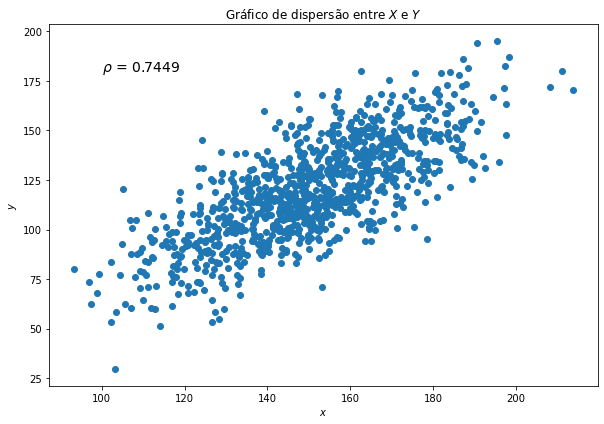

In [76]:
"""
Geração de variáveis normais correlacionadas
"""
#Dados de entrada:
n = 1000
mu_x = 150
sigma_x = 20
mu_y = 120
sigma_y = 25
rho = 0.75
# Geração de números randômicos de distribuição uniforme
u1 = np.random.rand(n)
u2 = np.random.rand(n)
# Geração de variáveis normais correlacionadas x e y
x = mu_x + sigma_x * np.sqrt(- 2 * np.log(u1)) * np.cos(2 * np.pi * u2)
mu_yx = mu_y + rho * sigma_y / sigma_x * (x - mu_x)
sigma_yx = sigma_y * np.sqrt(1 - rho ** 2)
y = mu_yx + sigma_yx * np.sqrt(- 2 * np.log(u1)) * np.sin(2 * np.pi * u2)
corr = np.corrcoef(x, y)
rho_xy = corr[0, 1]
# Gráfico de dispersão entre X e Y
plt.figure(1, figsize=(8.5, 6))
plt.scatter(x,y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Gráfico de dispersão entre $X$ e $Y$')
plt.text(100, 180, r"$\rho$ = {0:0.4f}".format(rho_xy), fontsize="14")
plt.tight_layout()
plt.show()

* O código abaixo mostra o mesmo problema resolvido através do __Modelo de Nataf__.
* Observe-se que esta formulação é mais genérica e pode ser aplicada $nvar$ variáveis com quaisquer distribuição de probabilidade.

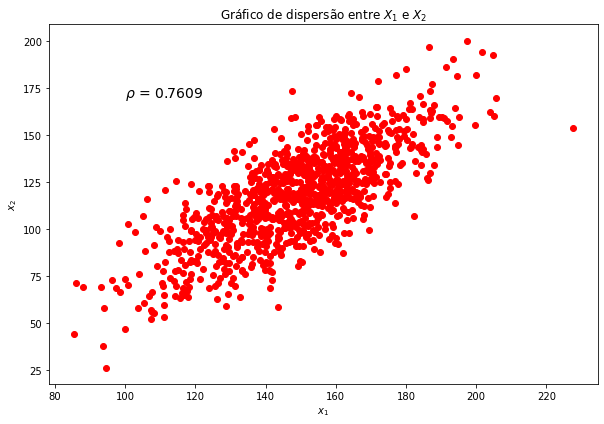

In [77]:
"""
Geração de variáveis aleatórias correlacionadas com o modelo de Nataf

"""
# Dados de entrada das variáveis X1 e X2
n = 1000
nvar = 2
mu_x1 = 150
sigma_x1 = 20
mu_x2 = 120
sigma_x2 = 25
rho = 0.75
# Geração de números randômicos de distribuição uniforme
u = np.random.rand(n,nvar)
# Decomposição de Cholesky da matriz de correlação Rz
rzmat = np.array([[1.00, 0.75],[0.75, 1.00]])
lmat = linalg.cholesky(rzmat, lower=True)
Jzy = np.copy(lmat)
# Geração de variáveis normais padronizadas não correlacionadas
y = norm.ppf(u)
# Aplicação da correlação nas variáveis "y" gerando as variáveis normais correlacionadas "z"
z = np.dot(Jzy, y.T).T
# Cálculo da probabilidade acumulada da variável "z" = uz
uz = norm.cdf(z)
# Geração das variáveis normais correlacionadas X1 e X2: Método da Transformação Inversa
x1= norm.ppf(uz[:, 0], mu_x1, sigma_x1)
x2= norm.ppf(uz[:, 1], mu_x2, sigma_x2)
corr = np.corrcoef(x1, x2)
rho_x1x2 = corr[0, 1]
# Gráfico de dispersão entre X1 e X2
plt.figure(1, figsize=(8.5, 6))
plt.scatter(x1, x2, color="red")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Gráfico de dispersão entre $X_1$ e $X_2$')
plt.text(100, 170, r"$\rho$ = {0:0.4f}".format(rho_x1x2), fontsize="14")
plt.tight_layout()
plt.show()

[Retornar ao início da aula](#section_6)

## __6.4 - Determinação de probabilidade de falha através do Método de Monte Carlo__  <a name="section_64"></a>

#### Função Performance ou Função Estado Limite:

* Em primeiro lugar é preciso definir uma função de performance do sistema: $g(X_1, X_2, ..., X_n) = 0$

* Forma típica da função performance: $g(X_1, X_2, ..., X_n) = R(X_1, X_2, ..., X_n) - S(X_1, X_2, ..., X_n) = 0$

* Onde:
* $R(X_1, X_2, ..., X_n)$ é a capacidade do sistema
* $S(X_1, X_2, ..., X_n)$ é a demanda do sistema

* Situações possíveis:
1. Se $g(X_1, X_2, ..., X_n) > 0 \rightarrow$ __segurança__
2. Se $g(X_1, X_2, ..., X_n) = 0 \rightarrow$ __estado limite__
3. Se $g(X_1, X_2, ..., X_n) < 0 \rightarrow$ __falha__

* A Figura abaixo ilustra estas três possibilidades, para o caso de uma função estado limite de duas variáveis aleatórias $X_1$ e $X_2$.

<img src="./images6/funcao_performance.jpg" alt="Função Performance ou Estado Limite" style="width:600px"/>

#### Probabilidade de falha:

* A probabilidade de falha do sistema será dada por: $P_f = P[g(X_1, X_2, ..., X_n) < 0]$

* Forma integral:

$$P_f = \int_{\Omega_f} f_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n)dx_1,dx_2,...,dx_n$$

* Onde $\Omega_f$ é o domínio da região de falha.

* Esta integral pode ser reescrita na forma:

$$P_f = \int_{\Omega}I_g(x_1,x_2,...,x_n) f_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n)dx_1,dx_2,...,dx_n$$

* Onde $\Omega$ é o domínio completo da função $g(X_1,X_2,...,X_n)$, englobando a região segura e a região de falha.

* $I_g(x_1,x_2,...,x_n)$ é a __função indicadora de falha__ definida como:

$$ I_g(x_1,x_2,...,x_n) = \left\{\begin{array}{ll} 1 \quad \text{se} \quad g(X_1,X_2,...,X_n) \leq 0 \\
                                                   0 \quad \text{se} \quad g(X_1,X_2,...,X_n) > 0  
                           \end{array} \right.$$
                           
* Observe-se que cada avaliação da função indicadora $I_g(x_1,x_2,...,x_n)$ implica uma avaliação da função estado limite $g(X_1,X_2,...,X_n)$.

* Além disso, nota-se que:

$$P_f = \int_{\Omega}I_g(x_1,x_2,...,x_n) f_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n)dx_1,dx_2,...,dx_n = E\left\{I_g(x_1,x_2,...,x_n)\right\}$$

* Ou seja, a probabilidade de falha do sistema é igual ao valor esperado da função indicadora $I_g(\textbf{x})$ , onde $\textbf{x}=\{x_1,x_2,...,x_n\}^t$.

* Então, para uma amostra formada por um número de simulações finito igual a $n_s$, a probabilidade de falha poderá ser estimada por:

$$P_f \approxeq \hat{P}_f = \frac{1}{n_s}\sum_{i=1}^{n_s} I_g(\textbf{x}_k) = \frac{n_f}{n_s}$$

* Onde o chapéu (^) indica que se trata de uma estimativa, e não do valor exato, $n_f$ é o número de falhas e $n_s$ é o número total de simulações.

* A variância da probabilidade de falha corresponde ao erro estatístico cometido na sua avaliação através da equação anterior e será dada por:

$$Var[\hat{P}_f] =\frac{1}{n_s} \frac{1}{n_s-1}\sum_{i=1}^{n_s}(I_g(\textbf{x}_k)-\hat{P}_f)^2$$

* O coeficiente de variação de $\hat{P}_f$ é calculado através da equação (HALDAR e MAHADEVAN, 2000):

$$\delta_{\hat{P}_f} = \frac{\sqrt{Var[\hat{P}_f]}}{E[\hat{P}_f]} \approxeq \sqrt{\frac{1 - P_f}{n_s P_f}} \implies n_s \approxeq \frac{1}{P_f \delta_{\hat{P}_f}^2}$$

* A equação anterior indica que o coeficiente de variação da probabilidade de falha $\delta_{\hat{P}_f}$ será tanto menor, quanto maior for o número de simulações $n_s$. Então, para uma probabilidade de falha da ordem de $10^{-p}$, para se garantir um coeficiente de variação $\delta_{\hat{P}_f}$ de no máximo $10\%$ é necessário realizar-se pelo menos $10^{p+2}$ simulações (BECK, 2019).

* O erro percentual cometido ao se avaliar uma probabilidade de falha $P_f$ através de $n_s$ simulações, empregando-se o Método de Monte Carlo Força Bruta, pode ser calculado através da equação (HALDAR e MAHADEVAN, 2000):

$$\text{erro(%)} = 200 \sqrt{\frac{1 - P_f}{n_s P_f}}$$ 

* Para sistemas complexos, com probabilidades de falha muito pequenas, o número de simulações necessárias será muito elevado, levando a um custo computacional proibitivo. Por este motivo, muitas vezes será necessário empregar as chamadas __técnicas de redução de variância__, que permitem reduzir o número de simulações necessárias para estimar a probabilidade de falha.

#### Algoritmo para o Método de Monte Carlo Força Bruta

* O Método de Monte Carlo conforme exposto neste item é conhecido como Método de Monte Carlo Direto ou Força Bruta, por não empregar técnicas de redução de variância. O algoritmo do Método de Monte Carlo Força Bruta pode ser descrito através dos seguintes passos:

1. Gerar $n_s$ amostras das variáveis aleatórias básicas do problema $\textbf{x}_k =\{x_1, x_2, ..., x_n\}_k^t$, empregando-se a função densidade de probabilidade conjunta $f_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n)$

2. Avaliar a função indicadora de falha $I_g(\textbf{x}_k)$ para cada amostra.

3. Calcular a média da probabilidade de falha através da equação:

$$P_f \approxeq \hat{P}_f = \frac{1}{n_s}\sum_{i=1}^{n_s} I_g(\textbf{x}_k) = \frac{n_f}{n_s}$$

4. Calcular a variância da probabilidade de falha usando a expressão:

$$Var[\hat{P}_f] = \frac{1}{ns}\frac{1}{n_s-1}\sum_{i=1}^{n_s}(I_g(\textbf{x}_k)-\hat{P}_f)^2$$

5. Calcular o coeficiente de variação da probabilidade de falha:

$$\delta_{\hat{P}_f} = \frac{\sqrt{Var[\hat{P}_f]}}{E[\hat{P}_f]}$$

6. Se o coeficiente de variação obtido no passo 5, for menor que o limite de tolerância estabelecido, encerrar o processo. Caso contrário, será necessário aumentar o número de simulações até que seja atingido o limite máximo estabelecido para o coeficiente de variação da probabilidade de falha.

#### Cálculo do índice de confiabilidade $\beta$ através do Método de Monte Carlo

* Um vez estimada a probabilidade de falha do sistema dentro de um coeficiente de variação previamente estabelecido, o índice de confiabilidade correspondente a esta probabilidade de falha pode ser calculado através da expressão:

$$\beta = \Phi^{-1}(\hat{P}_f)$$

* Onde $\Phi^{-1}()$ é a função inversa da distribuição de probabilidade acumulada de uma variável normal padronizada de média zero e variância unitária $N(0,1)$.

[Retornar ao início da aula](#section_6)

## __6.5 - Aplicações do Método de Monte Carlo__  <a name="section_65"></a>

### Exemplo 6.3 - Função não-linear

* Sejam três variáveis gaussianas:
* $X_1=N(500,75)$, 
* $X2=N(600,120)$, 
* $X3=N(700,210)$.
* Qual a distribuição de probabilidade da função:

$$Y = g(X_1,X_2,X_3) = \frac{X_1 X_3}{X_2}$$

* __Solução:__

* A distribuição de Y não será normal nem lognormal (ver Capítulo 4).
* Para determinar a distribuição de probabilidade de $Y$ será empregado o Método de Monte Carlo com a realização de 10.000 simulações.

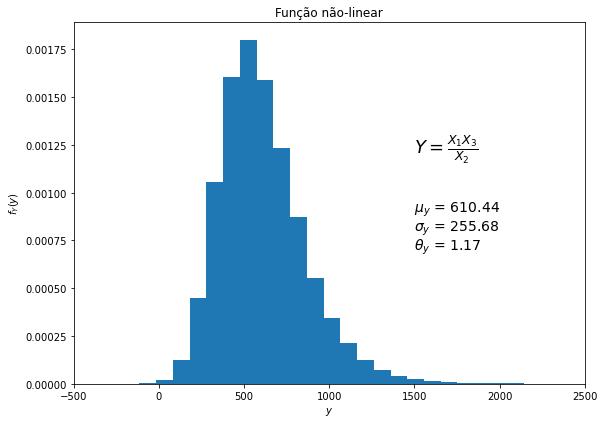

In [78]:
"""
Determinação da forma da distribuição de probabilidade de uma função não-linear
"""
# Dados de entrada
n = 10_0000
mu_x1 = 500.00
sigma_x1 = 75.00
mu_x2= 600.00
sigma_x2 = 120.00
mu_x3 = 700.00
sigma_x3 = 210.00
# Geração das amostras de X1, X2 e X3:
x1 = np.random.normal(mu_x1, sigma_x1, n)
x2 = np.random.normal(mu_x2, sigma_x2, n)
x3 = np.random.normal(mu_x3, sigma_x3, n)
# Cálculo da função y
y = x1 * x3 / x2
# Estatísticas da função y
mu_y = np.mean(y)
sigma_y = np.std(y)
theta_y = skew(y,bias=False)
# Histograma dos valores de y
plt.figure(figsize=(8.5, 6))
fy = plt.hist(y, bins=50, density=True)
plt.xlabel(r'$y$')
plt.ylabel(r'$f_{Y}(y)$')
plt.title('Função não-linear')
plt.text(1500, 0.0012, r"$Y =\frac{X_1 X_3}{X_2}$", fontsize="18")
plt.text(1500, 0.0009, r"$\mu_y$ = {0:0.2f}".format(mu_y), fontsize="14")
plt.text(1500, 0.0008, r"$\sigma_y$ = {0:0.2f}".format(sigma_y), fontsize="14")
plt.text(1500, 0.0007, r"$\theta_y$ = {0:0.2f}".format(theta_y), fontsize="14")
plt.xlim(-500, 2500)
plt.tight_layout()
plt.show()

### Exemplo 6.4 - Capacidade de carga de um grupo de estacas

<img src="./images6/grupo_estacas.jpg" alt="Grupo de Estacas" style="width:300px"/>

* Capacidade de carga das estacas $R$: distribuição normal com média $\mu_R = 5.000 kN$ e desvio padrão $\sigma_R=1500 kN$.

* Carga aplicada $S$: distribuição lognormal, com mediana $S_m = 3000 kN$ e coeficiente de variação igual a $\delta_S=0,33$.

* A probabilidade de falha do grupo de estacas sob as cargas aplicadas será dada por: $P_f = P(R-S<0)$

* A distribuição de probabilidade de $(R-S)$ não será normal, nem lognormal.

* É necessário usar simulações de Monte Carlo para calcular $P_f$.

* A probabilidade de falha, após $n_s$ simulações será dada por:

$$P_f = \frac{n_f}{n_s}$$

* Onde $n_f$ é o número de vezes em que ocorre $(R_i – S_i)<0$.

In [79]:
"""
Cálculo da probabilidade de falha de um grupo de estacas
"""
# Dados de entrada
mu_r = 5000.00
sigma_r= 1500.00
sm = 3000.00
delta_s = 0.33
ns = 100_000
# Geração das amostras de R e de S
r = np.random.normal(mu_r, sigma_r, ns)
#
mu_s = sm * np.sqrt(delta_s ** 2 + 1)
zeta_s = np.sqrt(np.log(delta_s ** 2 + 1))
lambda_s = np.log(mu_s) - 0.5 * zeta_s ** 2
s = np.random.lognormal(lambda_s, zeta_s, ns)
# Cálculo da probabilidade de falha
gx = r - s
igx = np.where(gx <= 0.00, 1.00, 0.00)
pf = np.mean(igx)
sigma_pf = np.std(igx) / np.sqrt(ns)
delta_pf = sigma_pf / pf
erro = 200 * np.sqrt((1 - pf) / (ns * pf))
#
print("pf = {0:0.2e}".format(pf))
print("delta_pf = {0:0.4f}".format(delta_pf))
print("erro(%) = {0:0.2f}".format(erro))

pf = 1.54e-01
delta_pf = 0.0074
erro(%) = 1.48


### Exemplo 6.5 - Deslocamento horizontal em uma plataforma

<img src="./images6/deslocamento_plataforma.jpg" alt="Deslocamento horizontal em plataforma" style="width:474px"/>

Fonte: https://www.ecmwf.int

* Deslocamento  horizontal $D$ em cm em uma plataforma marítima: $D = AF + BF^2 + \epsilon$

Onde:
$A$ e $B$ são constantes;
$F$ é a força máxima exercida pelas ondas;
$\epsilon$ = erro do modelo.

* Os dados estatísticos da variáveis do problema se encontram na tabela abaixo:

| Variável | Média | Coef.Var. | Distribuição |
|:--------:|:-----:|:---------:|:------------:|
| $F$ | 25 | 0,23 | Lognormal |
| $A$ | 0,0113 | 0,30 | Normal |
| $B$ | 0,0006 | 0,30 | Normal |
| $\epsilon$ | 0 | $\sigma$ = 0,10 | Normal |

* Para um desempenho satisfatório $D$ deve ser menor que $1 cm$.

* Calcular a probabilidade de falha $P_f$.

* Função performance: $g(A,B,F,\epsilon) = 1 - (AF + BF^2 + \epsilon)$

* Condição de falha: $g(A,B,F,\epsilon) < 0$

* Número de simulações $n_s = 100.000$

pf = 1.46e-01
delta_pf = 0.0076
erro(%) = 1.53


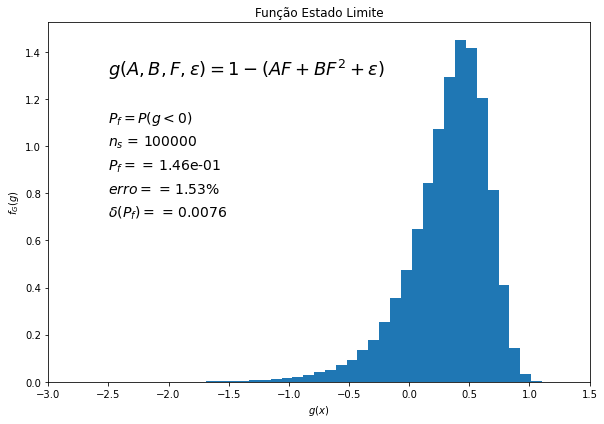

In [80]:
"""
Deslocamento horizontal em plataforma: cálculo da probabilidade de falha
"""
# Dados de entrada:
ns = 100_000
#
mu_f = 25.00
delta_f = 0.25
sigma_f = delta_f * mu_f
#
mu_a = 0.0113
delta_a = 0.30
sigma_a = delta_a * mu_a
#
mu_b = 0.0006
delta_b = 0.30
sigma_b = delta_b * mu_b
#
mu_e = 0.00
sigma_e = 0.10
# Geração das amostras para f, a, b e epsilon
# f = lognormal
zeta_f = np.sqrt(np.log(1 + delta_f ** 2))
lambda_f = np.log(mu_f) - 0.5 * zeta_f ** 2
f = np.random.lognormal(lambda_f, zeta_f, ns)
# a = normal
a = np.random.normal(mu_a, sigma_a, ns)
# b = normal
b = np.random.normal(mu_b, sigma_b, ns)
# e = normal
e = np.random.normal(mu_e, sigma_e, ns)
# Cálculo da probabilidade de falha
gx = 1.00 - a * f - b * f ** 2 - e
igx = np.where(gx <= 0.00, 1.00, 0.00)
pf = np.mean(igx)
sigma_pf = np.std(igx) / np.sqrt(ns)
delta_pf = sigma_pf / pf
erro = 200 * np.sqrt((1 - pf) / (ns * pf))
#
print("pf = {0:0.2e}".format(pf))
print("delta_pf = {0:0.4f}".format(delta_pf))
print("erro(%) = {0:0.2f}".format(erro))
# Histograma dos valores de y
plt.figure(figsize=(8.5, 6))
fy = plt.hist(gx, bins=50, density=True)
plt.xlabel(r'$g(x)$')
plt.ylabel(r'$f_{G}(g)$')
plt.title('Função Estado Limite')
plt.text(-2.5, 1.3, r"$g(A,B,F,\epsilon) = 1 - (AF + BF^2 + \epsilon)$", fontsize="18")
plt.text(-2.5, 1.1, r"$P_f = P(g<0)$", fontsize="14")
plt.text(-2.5, 1.0, r"$n_s$ = {0:0d}".format(ns), fontsize="14")
plt.text(-2.5, 0.9, r"$P_f = $ = {0:0.2e}".format(pf), fontsize="14")
plt.text(-2.5, 0.8, r"$erro = $ = {0:0.2f}%".format(erro), fontsize="14")
plt.text(-2.5, 0.7, r"$\delta(P_f) = $ = {0:0.4f}".format(delta_pf), fontsize="14")
plt.xlim(-3, 1.5)
plt.tight_layout()
plt.show()

[Retornar ao início da aula](#section_6)

## __6.6 - Amostragem por importância__  <a name="section_66"></a>

* De uma forma geral, a probabilidade de falha de um sistema de engenharia pode ser calculada através da expressão:

$$P_f = \int_{\Omega}I_g(\textbf{x})f_{\textbf{X}}(\textbf{x})d\textbf{x}$$

onde $\Omega$ é o domínio completo das variáveis $\textbf{X}$, incluindo as regiões segura e de falha, $I_g(\textbf{x})$ é a função indicadora de falha e $f_{\textbf{X}}(\textbf{x})$ é a função de densidade de probabilidade conjunta das variáveis $\textbf{X}$.

* A técnica da amostragem por importância consiste em introduzir-se no problema uma função de amostragem $h_{\textbf{X}}(\textbf{x})$, gerando-se os valores das variáveis aleatórias a partir dela. Assim, consegue-se gerar valores aleatórios das variáveis na região de maior importância, ou seja, a região de falha.


* Multipliando-se e dividindo-se a equação da probabilidade de falha $P_f$ pela função $h_{\textbf{X}}(\textbf{x})$ resulta:

$$P_f = \int_{\Omega}I_g(\textbf{x})\frac{f_{\textbf{X}}(\textbf{x})}{h_{\textbf{X}}(\textbf{x})}h_{\textbf{X}}(\textbf{x})d\textbf{x}$$

*  Esta expressão representa o cálculo do valor esperado da função $I_g(\textbf{x})\frac{f_{\textbf{X}}(\textbf{x})}{h_{\textbf{X}}(\textbf{x})}$ sobre a função de densidade de probabilidade de amostragem $h_{\textbf{X}}(\textbf{x})$.

* Realizando-se o cálculo deste valor esperado sobre uma amostra finita de tamanho $n_s$, a estimativa da probabilidade de falha será dada por:

$$P_f \approxeq \hat{P}_f = \frac{1}{n_s}\sum_{k=1}^{n_s}I_g(\textbf{x}_k)\frac{f_{\textbf{X}}(\textbf{x}_k)}{h_{\textbf{X}}(\textbf{x}_k)}$$

* Como a função de amostragem $h_{\textbf{X}}(\textbf{x})$ gera um número de pontos muito maior no domínio de falha o somatório da função indicadora $I_g(\textbf{x})$ será muito superior ao obtido pela função densidade de probabilidade conjunta original $f_{\textbf{X}}(\textbf{x})$.

* Este resultado é corrigido ao multiplicar-se os valores da função $I_g(\textbf{x}_k)$ por um fator peso $w_k$, muito menor que a unidade, dado por:

$$w_k = \frac{f_{\textbf{X}}(\textbf{x}_k)}{h_{\textbf{X}}(\textbf{x}_k)}$$

* Note-se, conforme visto no Capítulo 4, se as variáveis $\textbf{X}$ forem estatisticamente independentes tem-se que:

$$f_{\textbf{X}}(\textbf{x}) = \prod_{i=1}^{n} f_{Xi}(x_i) \quad \text{e} \quad h_{\textbf{X}}(\textbf{x}) = \prod_{i=1}^{n} h_{Xi}(x_i)$$

* A variância da estimativa da probabilidade de falha calculada com a técnica de amostragem por importância será dada por:

$$Var[\hat{P}_f] = \frac{1}{ns}\frac{1}{n_s-1}\sum_{i=1}^{n_s}(I_g(\textbf{x}_k)w_k-\hat{P}_f)^2$$

* A eficiência da técnica de amostragem por importância está diretamente relacionada à escolha da função de amostragem $h_{\textbf{X}}(\textbf{x})$. A escolha de uma função inadequada pode tornar a convergência para a probabilidade de falha exata mais lenta que a do Método de Monte Carlo Força Bruta.

* Naturalmente que a função ideal seria aquela dada por:

$$h_{\textbf{X}}(\textbf{x}_k) = \frac{f_{\textbf{X}}(\textbf{x}_k)}{P_f}$$

* Observe-se que com esta função de amostragem a probabilidade de falha seria encontrada com apenas uma simulação. No entanto, esta função é apenas hipotética, pois depende da probabilidade de falha $P_f$, que é justamente a incógnita do problema que se deseja resolver.

* No entanto, esta equação nos mostra que a função de amostragem $h_{\textbf{X}}(\textbf{x}_k)$ a ser escolhida deve ser proporcional à função densidade de probabilidade conjunta original $f_{\textbf{X}}(\textbf{x}_k)$ na região do domínio de falha (BECK, 2019). Na bibliografia indicada abaixo encontram-se diversas estratégias para a escolha da função de amostragem.

* O algoritmo para o Método de Monte Carlo com a técnica de __Amostragem por Importância__ é formado pelos seguintes passos:

1. Gerar $n_s$ amostras das variáveis aleatórias básicas do problema $\textbf{x}_k =\{x_1, x_2, ..., x_n\}_k^t$, empregando-se a função de amostragem $h_{\textbf{X}}(x_1,x_2,...,x_n)$

2. Avaliar a função indicadora de falha $I_g(\textbf{x}_k)$ para cada amostra.

3. Calcular o peso de cada valor da amostra dado por:

$$w_k = \frac{f_{\textbf{X}}(\textbf{x}_k)}{h_{\textbf{X}}(\textbf{x}_k)}$$

4. Calcular a média da probabilidade de falha através da equação:

$$P_f \approxeq \hat{P}_f = \frac{1}{n_s}\sum_{i=1}^{n_s} I_g(\textbf{x}_k)w_k $$

5. Calcular a variância da probabilidade de falha usando a expressão:

$$Var[\hat{P}_f] = \frac{1}{ns}\frac{1}{n_s-1}\sum_{i=1}^{n_s}(I_g(\textbf{x}_k)-\hat{P}_f)^2$$

6. Calcular o coeficiente de variação da probabilidade de falha:

$$\delta_{\hat{P}_f} = \frac{\sqrt{Var[\hat{P}_f]}}{E[\hat{P}_f]}$$

7. Se o coeficiente de variação obtido no passo 5, for menor que o limite de tolerância estabelecido, encerrar o processo. Caso contrário, será necessário aumentar o número de simulações até que seja atingido o limite máximo estabelecido para o coeficiente de variação da probabilidade de falha, ou então escolher uma nova função de amostragem $h_{\textbf{X}}(\textbf{x}_k)$ de forma a melhorar a convergência do Método de Monte Carlo.



#### Exemplo 6.6 - Probabilidade de falha de uma barra tracionada

<img src="./images6/tensioned_bar.jpg" alt="Barra tracionada" style="width:474px"/>

* Empregando-se os mesmos dados apresentados no item 1.5 do Capítulo 1, deseja-se avaliar a probabilidade de falha de uma tracionada empregando-se o Método de Monte Carlo com a técnica de Amostragem por Importância.

* Dados:

* A tensão de escoamento do aço possui um valor médio $f_{ym} = 275 MPa$, com um coeficiente de variação $\delta_{fy} = 0,10$;
* A carga permanente possui um valor médio de $G_m = 60 kN$, com um coeficiente de variação $\delta_g = 0,10$;
* A carga permanente possui um valor médio de $Q_m =70 kN$, com um coeficiente de variação $\delta_g = 0,30$;
* Todas estas variáveis possuam distribuição normal de probabilidade. 

* A função estado limite será dada por: $g(x) = f_y A_s - G - Q = 0$

* Para uma barra de $32 mm$ de diâmetro, a área de seção transversal $A_s$ vale $804,25 mm^2$

* Da solução do problema no Capítulo 1, sabe-se que o valor exato de $P_f$ é igual a $1,6782\times 10^{-3}$, e que este valor corresponde a um índice de confiabilidade $\beta = 2,93$.

* __Solução__:

* Dado que todas as variáveis possuem distribuição normal de probabilidade, uma primeira opção para as funções de amostragem seria adotar-se também uma distribuição normal de probabilidade, mas com os seus valores médios deslocados de um certo número $k$ de desvios padrões no sentido mais desfavorável.

* Fazendo-se $k = 1,50$:
* Variável da capacidade resistente: tensão de escoamento do aço: $\mu_{h-fy} = 275 - 1,50 \times 0,10 \times 275 = 233,75 MPa$
* Variável da solicitação: carga permanente: $\mu_{h-g} = 60 + 1,50 \times 0,10 \times 60 = 69 kN$
* Variável da solicitação: carga permanente: $\mu_{h-q} = 70 + 1,50 \times 0,30 \times 70 = 101,50 kN$
* Os desvios padrões de todas as variáveis aleatórias do probelma serão mantidos constantes.

* Em primeiro lugar será realizada a solução com o método de Monte Carlo Força Bruta, empregando-se $10^6$ simulações.

In [81]:
"""
Probabilidade de falha de uma barra tracionada - Monte Carlo Força Bruta
"""
# Dados de entrada:
ns = 1_000_000
#
mu_fy = 275.00  # MPa
delta_fy = 0.10
sigma_fy = delta_fy * mu_fy
#
mu_g = 60.00  # kN
delta_g = 0.10
sigma_g = delta_g * mu_g
#
mu_q = 70.00  # kN
delta_q = 0.30
sigma_q = delta_q * mu_q
#
ast= 804.25  # mm2
# Geração das amostras para fy, g e q usando a função de amostragem h(x)
# fy = normal
fy = np.random.normal(mu_fy, sigma_fy, ns)
# b = normal
g = np.random.normal(mu_g, sigma_g, ns)
# e = normal
q = np.random.normal(mu_q, sigma_q, ns)
# Cálculo da probabilidade de falha
gx = 1e-3 * ast * fy - g - q
igx = np.where(gx <= 0.00, 1.00, 0.00)
pf = np.mean(igx)
sigma_pf = np.std(igx) / np.sqrt(ns)
delta_pf = sigma_pf / pf
erro = 200 * np.sqrt((1 - pf) / (ns * pf))
#
print("pf = {0:0.2e}".format(pf))
print("delta_pf = {0:0.4f}".format(delta_pf))
print("erro(%) = {0:0.2f}".format(erro))

pf = 1.67e-03
delta_pf = 0.0245
erro(%) = 4.90


* Observa-se que são necessárias $10^6$ simulações para que a solução exata seja aproximada com boa precisão.

* Abaixo segue a solução com a técnica de Amostragem por Importância em que um resultado praticamente idêntico é alcançado com 10.000 simulações.

pf = 1.64e-03
delta_pf = 0.0270
erro = 2.4001%


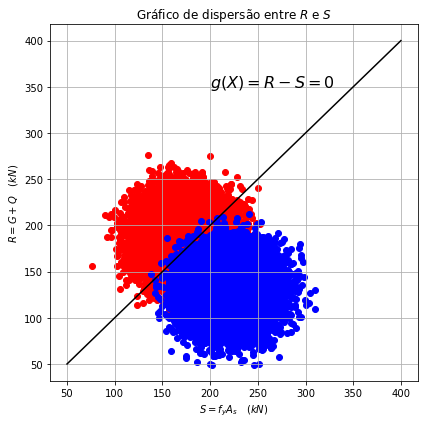

In [82]:
"""
Probabilidade de falha de uma barra tracionada - Amostragem por importância
"""
# Dados de entrada:
ns = 20_000
k = 1.5
exact = 1.6782e-3
#
mu_fy = 275.00  # MPa
delta_fy = 0.10
sigma_fy = delta_fy * mu_fy
muh_fy = mu_fy - k * sigma_fy
sigmah_fy = sigma_fy
#
mu_g = 60.00  # kN
delta_g = 0.10
sigma_g = delta_g * mu_g
muh_g = mu_g + k * sigma_g
sigmah_g = sigma_g
#
mu_q = 70.00  # kN
delta_q = 0.30
sigma_q = delta_q * mu_q
muh_q = mu_q +  k * sigma_q
sigmah_q = sigma_q
#
ast= 804.25  # mm2
# Geração das amostras para fy, g e q usando a função de amostragem h(x)
# fy = normal
fy = np.random.normal(muh_fy, sigmah_fy, ns)
# b = normal
g = np.random.normal(muh_g, sigmah_g, ns)
# e = normal
q = np.random.normal(muh_q, sigmah_q, ns)
# Cálculo dos pesos wk
fx = norm.pdf(fy, mu_fy, sigma_fy) * norm.pdf(g, mu_g, sigma_g) * norm.pdf(q, mu_q, sigma_q)
hx = norm.pdf(fy, muh_fy, sigmah_fy) * norm.pdf(g, muh_g, sigmah_g) * norm.pdf(q, muh_q, sigmah_q)
wk = fx / hx
# Cálculo da probabilidade de falha
gx = 1e-3 * ast * fy - g - q
igx = np.where(gx <= 0.00, 1.00, 0.00)
pf = np.mean(igx * wk)
sigma_pf = np.std(igx * wk) / np.sqrt(ns)
delta_pf = sigma_pf / pf
erro =np.abs((pf- exact) / exact) * 100
#
print("pf = {0:0.2e}".format(pf))
print("delta_pf = {0:0.4f}".format(delta_pf))
print("erro = {0:0.4f}%".format(erro))
# Gráfico de dispersão
sh = fy * ast / 1000
rh= g + q
#
mu_r = mu_fy * ast / 1000
sigma_r = sigma_fy * ast / 1000
#
mu_s = mu_g + mu_q
sigma_s = np.sqrt(sigma_g ** 2 + sigma_q ** 2)
#
rf = np.random.normal(mu_r, sigma_r, ns)
sf = np.random.normal(mu_s, sigma_s, ns)
#
r = np.linspace(50, 400, 1000)
s = r
plt.figure(1, figsize=(6, 6))
plt.scatter(rh, sh, color="red")
plt.scatter(rf, sf, color="blue")
plt.plot(r, s, color="black")
plt.xlabel(r'$S = f_y A_s\quad (kN)$')
plt.ylabel(r'$R = G + Q \quad (kN)$')
plt.title('Gráfico de dispersão entre $R$ e $S$')
plt.text(200, 350, r"$g(X)=R-S = 0$", fontsize="16")
plt.grid()
plt.tight_layout()
plt.show()

* Observe-se que com apenas 20.000 simulações o erro é menor que 5%.

* No gráfico acima, os pontos em azul são gerados com a função densidade de probabilidade conjunta original $f_{\textbf{X}}(\textbf{x})$, enquanto que os pontos em vermelho são gerados com a função de amostragem $h_{\textbf{X}}(\textbf{x})$.

* Note-se que a função de amostragem $h_{\textbf{X}}(\textbf{x})$ gera muito mais pontos sobre a região de falha $(S > R)$.

[Retornar ao início da aula](#section_6)

## __Bibliografia__

* __Livros__
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume I:  basic principles. New  York, John Wiley & Sons, 1975.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume II: decision, risk and reliability. New  York, John Wiley & Sons, 1984.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.
* BECK, A. T. Confiabilidade e segurança das  estruturas. Rio de Janeiro, Elsevier, 2019.
* HALDAR, A. MAHADEVAN, S. Probability, reliability, and statistical methods in engineering design. New York, Wiley, 2000.
* MELCHERS, R.E., BECK, A. T.; Structural reliability analysis and prediction. 3rd ed. John Wiley and Sons, 2018, 514p.

[Retornar ao início da aula](#section_6)